In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction to the Data

In [8]:
# facebook stock data
fb = pd.read_csv("data/facebook.csv")
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [3]:
# microsoft stock data
ms = pd.read_csv("data/microsoft.csv")
ms.head(

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [4]:
fb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,80.212705,81.285654,79.022397,80.264897,79.914215,1.204453e+07
std,64.226121,65.048907,63.190963,64.198375,64.327846,8.221848e+06
min,19.250000,19.500000,18.940001,19.139999,18.576082,1.311200e+06
25%,25.525000,26.085000,24.845000,25.475000,25.134512,7.215200e+06
50%,53.379999,54.034999,52.930000,53.420000,53.035403,9.728700e+06
75%,113.322502,115.779999,110.297499,113.702501,113.261238,1.408885e+07
max,245.770004,249.270004,244.449997,246.850006,246.850006,9.232320e+07


In [5]:
ms.describe()

,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,58.912308,59.372308,58.465000,58.945397,56.931553,2.978900e+07
std,12.852040,12.868060,12.802831,12.830350,13.670080,1.522319e+07
min,40.340000,40.740002,39.720001,40.290001,37.267815,7.425600e+06
25%,47.894998,48.295000,47.535001,47.974998,44.792073,2.096685e+07
50%,56.150002,56.640001,55.700001,56.209999,53.775458,2.623125e+07
75%,67.892500,68.174997,67.447500,67.740000,66.565508,3.408020e+07
max,95.139999,96.070000,93.720001,95.010002,94.565781,1.691640e+08


In [11]:
fb.set_index('Date', inplace=True)

In [12]:
ms.set_index('Date', inplace=True)

<Axes: title={'center': 'Facebook Stock Close'}, xlabel='Date'>

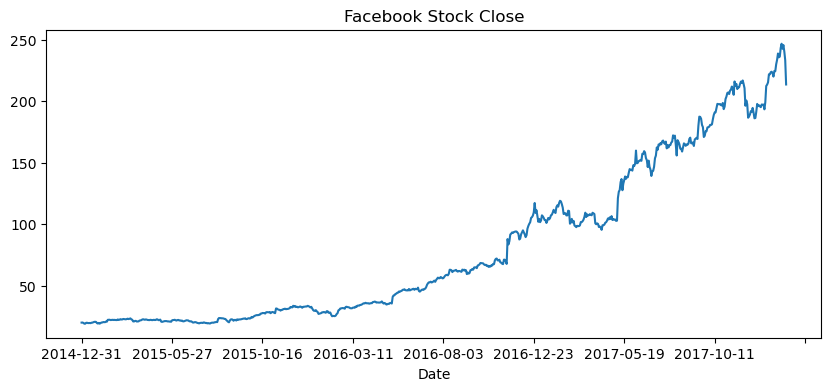

In [24]:
fb.Close.plot(figsize=(10, 4), title="Facebook Stock Close")

<Axes: title={'center': 'Microsoft Stock Close'}, xlabel='Date'>

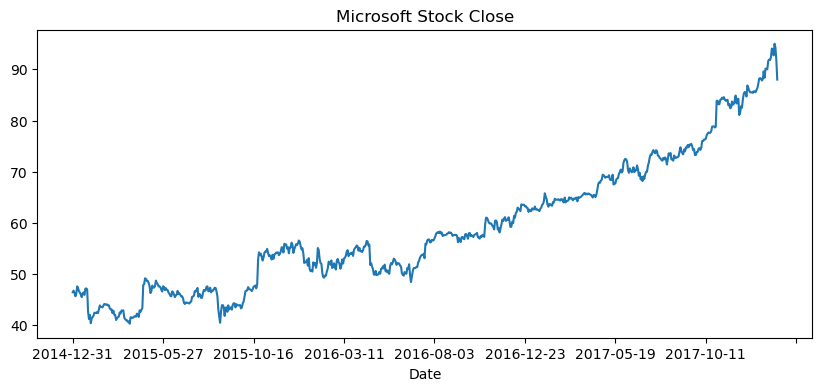

In [25]:
ms.Close.plot(figsize=(10, 4), title="Microsoft Stock Close")

# Basic Concepts

## Daily Return

The daily return is difference between the closing price for the next day and the closing price today, as a percentage of the closing price today.

In [26]:
# we shift the closing price by one row and compute the difference with closing price today
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']
fb.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff
Date,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,0.080000
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,-0.339998
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.600000
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.050002
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,0.720002


In [30]:
# the daily return for Facebook stocks
fb['Return'] = fb['PriceDiff'] /fb['Close']

## Direction

The direction is positive if the difference in closing price between the next day and today is greater than zero.

In [34]:
# now we compute the direction of stock price (positve or negative)
fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else -1 for ei in fb.index ]

In [36]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction
Date,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,0.080000,0.003990,1
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,-0.339998,-0.016890,-1
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.600000,-0.030318,-1
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.050002,-0.002606,-1
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,0.720002,0.037618,1


<Axes: >

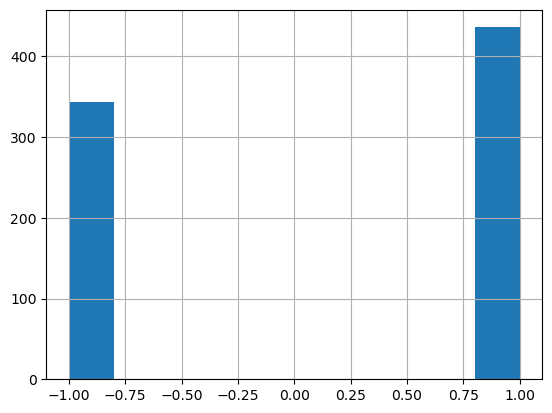

In [53]:
fb.Direction.hist()

## Moving Average

In [56]:
# moving average manual calculation
manual_ma3 = (fb.Close.shift(1) + fb.Close.shift(2) + fb.Close)/3

In [57]:
# moving average using rolling method from pandas
pandas_ma3 = fb.Close.rolling(3).mean()

In [59]:
manual_ma3[:10]

Date
2014-12-31          NaN
2015-01-02          NaN
2015-01-05    19.990000
2015-01-06    19.703334
2015-01-07    19.373334
2015-01-08    19.396667
2015-01-09    19.646667
2015-01-12    19.830001
2015-01-13    19.763334
2015-01-14    19.696667
Name: Close, dtype: float64

In [60]:
pandas_ma3[:10]

Date
2014-12-31          NaN
2015-01-02          NaN
2015-01-05    19.990000
2015-01-06    19.703334
2015-01-07    19.373334
2015-01-08    19.396667
2015-01-09    19.646667
2015-01-12    19.830001
2015-01-13    19.763334
2015-01-14    19.696667
Name: Close, dtype: float64

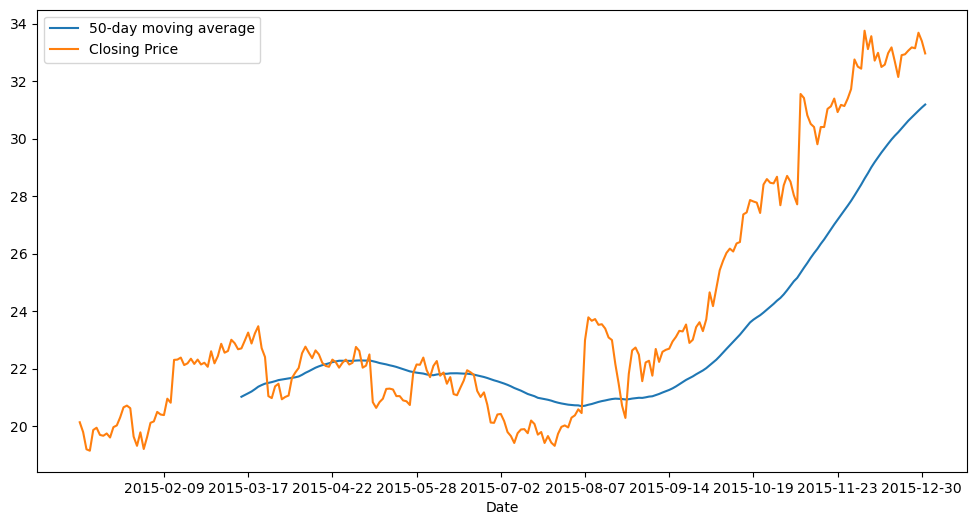

In [47]:
# create a moving average of 50 days using rolling window
fb['ma50'] = fb['Close'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(12, 6))
fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='50-day moving average')
fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Closing Price')
plt.legend()
plt.show()

<Axes: >

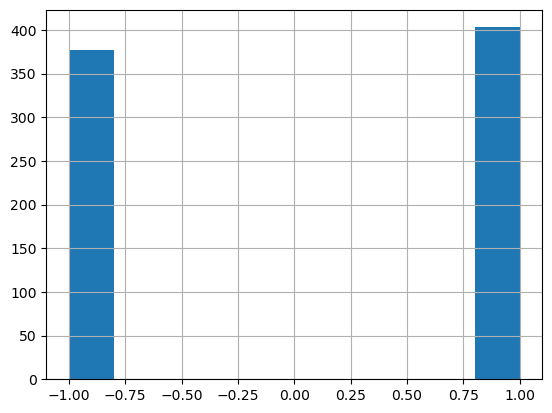

In [54]:
# in a similar manner we compute the daily return and direction for microsoft stocks
ms['PriceDiff'] = ms['Close'].shift(-1) - ms['Close']
ms['Return'] = ms['PriceDiff']/ms['Close']
ms['Direction'] = [1 if ms['PriceDiff'].loc[ei] > 0 else -1 for ei in ms.index ]

ms.Direction.hist()

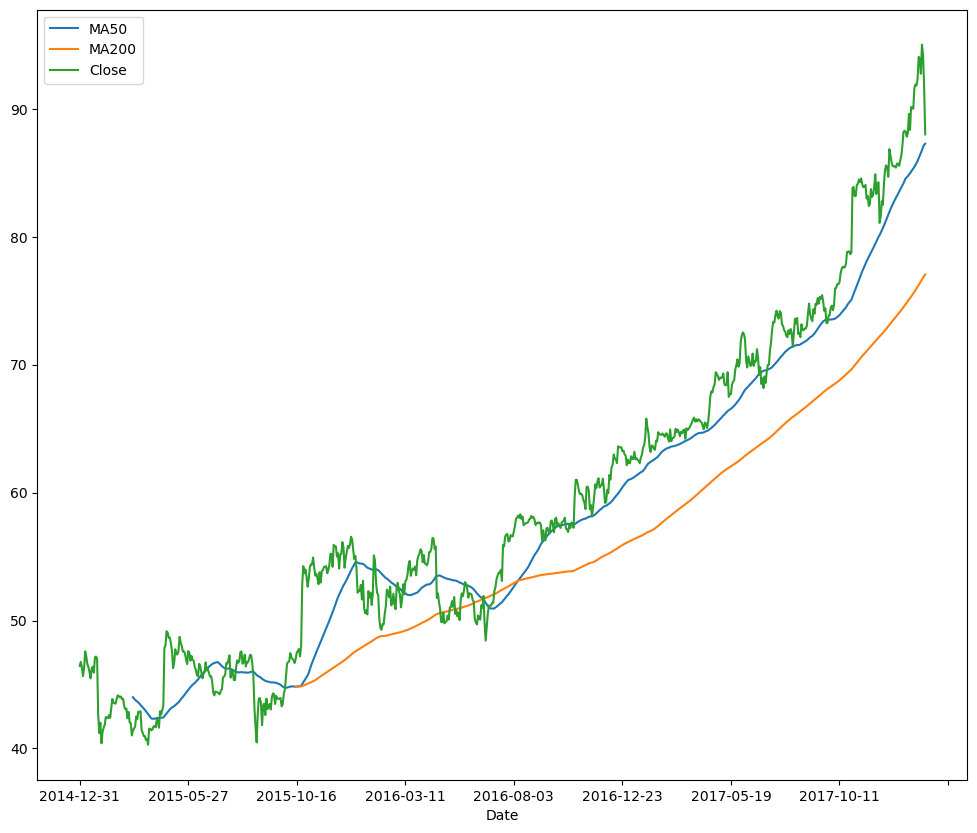

In [61]:
# compute and plot moving average for Microsoft stocks
ms['ma50'] = ms['Close'].rolling(50).mean() # fast signal
ms['ma200'] = ms['Close'].rolling(200).mean() # slow signal

# plot the moving average
plt.figure(figsize=(12, 10))
ms['ma50'].plot(label='MA50')
ms['ma200'].plot(label='MA200')
ms['Close'].plot(label='Close')
plt.legend()
plt.show()

Remarks:
- The moving average smoothes out the original closing price
- ma50 is more closely associated with the original closing price than ma200, hence ma50 is referred to here as the **Fast Signal**
- ma200 reflects the closing price over a long history, hence is referred to as the **Slow Signal**
- if the fast signal is above the slow signal, the so-called **trend-following traders** believe that the stock price will move up for a while